In [21]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import io

In [22]:
def get_sonar():
    # global sonar_val
    # j=0
    # for i in range(0,20,0.3):
    #     sonar_val.append(i)
    
    return np.random.randint(low=0,high=5)+50

In [23]:
sonar_val=[]
alpha=0.7
n_samples=500
time_end=10


In [24]:
def low_pass_filter(x_meas, x_esti):
    """Calculate average sonar using a low-pass filter."""
    x_esti = alpha * x_esti + (1 - alpha) * x_meas
    return x_esti

In [25]:
dt = time_end/n_samples
time= np.arange(0,time_end,dt)
x_meas_save=np.zeros(n_samples)
x_esti_save=np.zeros(n_samples)

In [26]:
x_esti = None
for i in range(n_samples):
    x_meas = get_sonar()
    if i == 0:
        x_esti=x_meas
    else:
        x_esti = low_pass_filter(x_meas, x_esti)

    x_meas_save[i] = x_meas
    x_esti_save[i] = x_esti

Text(0, 0.5, 'Altitude [m]')

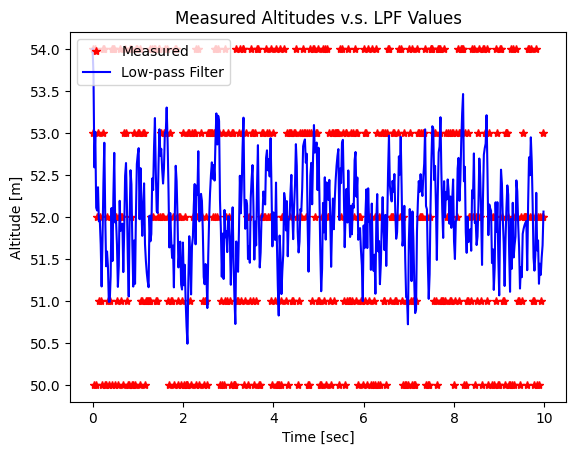

In [27]:
plt.plot(time, x_meas_save, 'r*', label='Measured')
plt.plot(time, x_esti_save, 'b-', label='Low-pass Filter')
plt.legend(loc='upper left')
plt.title('Measured Altitudes v.s. LPF Values')
plt.xlabel('Time [sec]')
plt.ylabel('Altitude [m]')